<a href="https://colab.research.google.com/github/GoryachevDaniil/UAI_AI_project_intro/blob/main/%D0%93%D0%BE%D1%80%D1%8F%D1%87%D0%B5%D0%B2_%D0%94_%22%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B9_%D1%81%D0%BB%D0%BE%D0%B9_(Dense)_%7C_%D0%94%D0%97_Ultra_Pro_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не 
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline 

In [ ]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Вывод формы данных для обучения
x_train_org.shape

(60000, 28, 28)

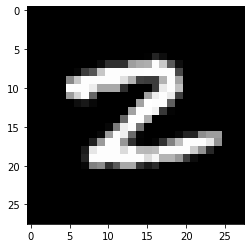

In [ ]:
# Номер картинки
n = 143

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [ ]:
# Вывод метки класса для n-го изображения
print(y_train_org[n])

2


In [ ]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)   
x_test = x_test_org.reshape(x_test_org.shape[0], -1)   

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [ ]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

In [ ]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

In [ ]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [ ]:
# Вывод примера одного выходного вектора
print(y_train[0]) 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [ ]:
# Вывод метки, соответствующей 36-му элементу
print(y_train_org[36])

6


In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu')) 

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax')) 

In [ ]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


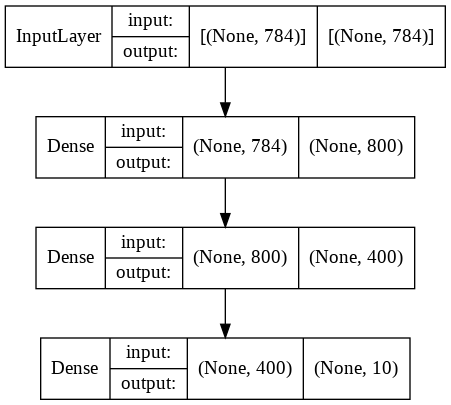

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 [==============================] - 6s 11ms/step - loss: 0.2015 - accuracy: 0.9408
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0755 - accuracy: 0.9768
Epoch 3/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0478 - accuracy: 0.9848
Epoch 4/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0332 - accuracy: 0.9892
Epoch 5/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 6/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0216 - accuracy: 0.9928
Epoch 7/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 8/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0139 - accuracy: 0.9953
Epoch 9/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0168 - accuracy: 0.9945
Epoch 10/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0140 - accura

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

In [ ]:
from keras.preprocessing import image

In [ ]:
from PIL import ImageOps

In [ ]:
img = image.load_img('/content/drive/MyDrive/one.jpg', target_size=(28, 28), color_mode = 'grayscale')

In [ ]:
img

In [ ]:
inverted_image = ImageOps.invert(img)

In [ ]:
inverted_image

In [ ]:
my_image_array = image.img_to_array(inverted_image)

In [ ]:
my_image_array.shape

(28, 28, 1)

In [ ]:
my_image_array = my_image_array.reshape(my_image_array.shape[0], -1)  

In [ ]:
my_norm_image_array = my_image_array.astype('float32') / 255

In [ ]:
my_norm_image_array.shape

(28, 28)

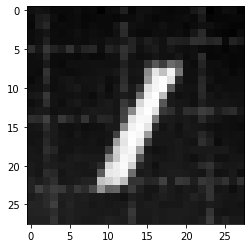

In [ ]:
plt.imshow(my_norm_image_array, cmap='gray')
plt.show()

In [ ]:
x = my_norm_image_array
print(x.shape)

(28, 28)


In [ ]:
k = np.reshape(x, (784,))

In [ ]:
k.shape

(784,)

In [ ]:
k = np.expand_dims(k, axis=0)
print(k.shape)

(1, 784)


In [ ]:
prediction = model.predict(k)

In [ ]:
print(prediction)

[[5.1846188e-02 2.1523207e-01 1.9761784e-01 2.8293287e-02 1.4367176e-04
  7.1168147e-02 3.4437796e-01 5.5952422e-02 2.5298480e-02 1.0069863e-02]]


In [ ]:
sum(prediction[0])

0.9999999416759238

In [ ]:
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 6
